<a href="https://colab.research.google.com/github/elliotb456/Convolutional-Neural-Network/blob/main/CS4287_Assign2_20260962_20229313_20278667.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Elliot Buckley (20260962), Michael Byrnes (20229313), Cian Perill (20278667)

The code executes to completion

Based on: https://www.kaggle.com/datasets/adityakomaravolu/brain-tumor-mri-images/data

Link to the google drive that contains the notebook and data: https://drive.google.com/drive/folders/1gxQij-1SD9liQ7oKs-hRYk-hjnOjAiDL?usp=drive_link

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from google.colab import drive

# Mounts the Google Drive for accessing the dataset directly from Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Output:
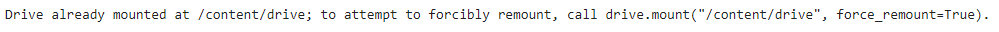

In [ ]:

# Define the base directory where the dataset is located in Google Drive
base_path = '/content/drive/My Drive/CS4287_Assignment.02/MRI Scans3'
train_path = os.path.join(base_path, 'Training')
test_path = os.path.join(base_path, 'Testing')
image_size = (224, 224)
num_classes = 4

In [ ]:
# Function to read and preprocess images, convert them to arrays
def images_to_arrays(data_path, image_size):
    images = []
    labels = []
    categories = os.listdir(data_path)

    for category in categories:
        cat_path = os.path.join(data_path, category)
        if os.path.isdir(cat_path):
            image_files = os.listdir(cat_path)
            for image_file in image_files:
                if image_file.lower().endswith('jpg'):
                    image_path = os.path.join(cat_path, image_file)
                    image = load_img(image_path, target_size=image_size)
                    image_array = img_to_array(image)
                    images.append(image_array)
                    labels.append(category)
    return np.array(images), labels

def save_npy_files(images, labels, prefix):
    np.save(f'{prefix}_images.npy', images)
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)
    categorical_labels = to_categorical(encoded_labels, num_classes=num_classes)
    np.save(f'{prefix}_labels.npy', categorical_labels)
    np.save(f'{prefix}_label_encoder.npy', label_encoder.classes_)

In [ ]:
# Load or process the training data
if os.path.exists('train_images.npy') and os.path.exists('train_labels.npy'):
    train_images = np.load('train_images.npy')
    train_labels = np.load('train_labels.npy')
else:
    train_images, train_labels = images_to_arrays(train_path, image_size)
    save_npy_files(train_images, train_labels, 'train')

In [ ]:
# Convert the images and labels to NumPy arrays if they are not already
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# KFold Cross Validation
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True)

fold_no = 1
for train, test in kfold.split(train_images, train_labels):
    base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=image_size + (3,)))
    base_model.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    print(f'Training for fold {fold_no} ...')

    history = model.fit(train_images[train], train_labels[train],
                        batch_size=32,
                        epochs=10,
                        validation_data=(train_images[test], train_labels[test]))

    fold_no += 1

Training for fold 1 ...
Epoch 1/10
5/5 [==============================] - 63s 10s/step - loss: 1.1695 - accuracy: 0.5125 - val_loss: 0.6135 - val_accuracy: 0.8250
Epoch 2/10
5/5 [==============================] - 47s 10s/step - loss: 0.4292 - accuracy: 0.8687 - val_loss: 0.3417 - val_accuracy: 0.9000
Epoch 3/10
5/5 [==============================] - 42s 9s/step - loss: 0.2473 - accuracy: 0.9250 - val_loss: 0.2143 - val_accuracy: 0.9750
Epoch 4/10
5/5 [==============================] - 41s 9s/step - loss: 0.1564 - accuracy: 0.9750 - val_loss: 0.1418 - val_accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 47s 10s/step - loss: 0.1158 - accuracy: 0.9750 - val_loss: 0.1098 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 41s 9s/step - loss: 0.0907 - accuracy: 0.9937 - val_loss: 0.1017 - val_accuracy: 0.9750
Epoch 7/10
5/5 [==============================] - 44s 10s/step - loss: 0.0693 - accuracy: 0.9937 - val_loss: 0.0836 - val_accuracy: 1.0000
Epoch 

Output:

Training for fold 1 ...

Epoch 1/10

5/5 [==============================] - 63s 10s/step - loss: 1.1695 - accuracy:
0.5125 - val_loss: 0.6135 - val_accuracy: 0.8250

Epoch 2/10

5/5 [==============================] - 47s 10s/step - loss: 0.4292 - accuracy: 0.8687 - val_loss: 0.3417 - val_accuracy: 0.9000

Epoch 3/10

5/5 [==============================] - 42s 9s/step - loss: 0.2473 - accuracy: 0.9250 - val_loss: 0.2143 - val_accuracy: 0.9750

Epoch 4/10

5/5 [==============================] - 41s 9s/step - loss: 0.1564 - accuracy: 0.9750 - val_loss: 0.1418 - val_accuracy: 1.0000

Epoch 5/10

5/5 [==============================] - 47s 10s/step - loss: 0.1158 - accuracy: 0.9750 - val_loss: 0.1098 - val_accuracy: 1.0000

Epoch 6/10

5/5 [==============================] - 41s 9s/step - loss: 0.0907 - accuracy: 0.9937 - val_loss: 0.1017 - val_accuracy: 0.9750

Epoch 7/10

5/5 [==============================] - 44s 10s/step - loss: 0.0693 - accuracy: 0.9937 - val_loss: 0.0836 - val_accuracy: 1.0000

Epoch 8/10

5/5 [==============================] - 43s 9s/step - loss: 0.0576 - accuracy: 1.0000 - val_loss: 0.0750 - val_accuracy: 1.0000

Epoch 9/10

5/5 [==============================] - 42s 9s/step - loss: 0.0478 - accuracy: 1.0000 - val_loss: 0.0775 - val_accuracy: 0.9750

Epoch 10/10

5/5 [==============================] - 46s 10s/step - loss: 0.0398 - accuracy: 1.0000 - val_loss: 0.0734 - val_accuracy: 0.9750

Training for fold 2 ...

Epoch 1/10

5/5 [==============================] - 50s 10s/step - loss: 1.2486 - accuracy: 0.4500 - val_loss: 0.6219 - val_accuracy: 0.8750

Epoch 2/10

5/5 [==============================] - 45s 10s/step - loss: 0.4555 - accuracy:
0.8938 - val_loss: 0.2814 - val_accuracy: 0.9500

Epoch 3/10

5/5 [==============================] - 44s 9s/step - loss: 0.2591 - accuracy: 0.9438 - val_loss: 0.1462 - val_accuracy: 1.0000

Epoch 4/10

5/5 [==============================] - 43s 9s/step - loss: 0.1607 - accuracy: 0.9750 - val_loss: 0.1073 - val_accuracy: 0.9750

Epoch 5/10

5/5 [==============================] - 45s 10s/step - loss: 0.1158 - accuracy: 0.9875 - val_loss: 0.0856 - val_accuracy: 0.9750

Epoch 6/10

5/5 [==============================] - 45s 9s/step - loss: 0.0819 - accuracy: 1.0000 - val_loss: 0.0679 - val_accuracy: 1.0000

Epoch 7/10

5/5 [==============================] - 42s 9s/step - loss: 0.0657 - accuracy: 1.0000 - val_loss: 0.0584 - val_accuracy: 1.0000

Epoch 8/10

5/5 [==============================] - 45s 10s/step - loss: 0.0529 - accuracy: 1.0000 - val_loss: 0.0504 - val_accuracy: 1.0000

Epoch 9/10

5/5 [==============================] - 44s 9s/step - loss: 0.0438 - accuracy: 1.0000 - val_loss: 0.0461 - val_accuracy: 1.0000

Epoch 10/10

5/5 [==============================] - 44s 9s/step - loss: 0.0376 - accuracy: 1.0000 - val_loss: 0.0428 - val_accuracy: 1.0000

Training for fold 3 ...

Epoch 1/10

5/5 [==============================] - 54s 10s/step - loss: 1.1957 - accuracy: 0.4563 - val_loss: 0.8072 - val_accuracy: 0.7000

Epoch 2/10

5/5 [==============================] - 42s 9s/step - loss: 0.4585 - accuracy: 0.8750 - val_loss: 0.5703 - val_accuracy: 0.8250

Epoch 3/10

5/5 [==============================] - 42s 9s/step - loss: 0.2515 - accuracy: 0.9625 - val_loss: 0.4237 - val_accuracy: 0.8500

Epoch 4/10

5/5 [==============================] - 45s 10s/step - loss: 0.1431 - accuracy: 0.9688 - val_loss: 0.3416 - val_accuracy: 0.8750

Epoch 5/10

5/5 [==============================] - 41s 9s/step - loss: 0.0973 - accuracy: 0.9937 - val_loss: 0.3056 - val_accuracy: 0.8500

Epoch 6/10

5/5 [==============================] - 44s 10s/step - loss: 0.0743 - accuracy: 1.0000 - val_loss: 0.2851 - val_accuracy: 0.8500

Epoch 7/10

5/5 [==============================] - 44s 9s/step - loss: 0.0542 - accuracy: 1.0000 - val_loss: 0.3145 - val_accuracy: 0.8750

Epoch 8/10

5/5 [==============================] - 41s 9s/step - loss: 0.0456 - accuracy: 1.0000 - val_loss: 0.2963 - val_accuracy: 0.8500

Epoch 9/10

5/5 [==============================] - 44s 10s/step - loss: 0.0379 - accuracy: 1.0000 - val_loss: 0.2449 - val_accuracy: 0.8500

Epoch 10/10

5/5 [==============================] - 43s 9s/step - loss: 0.0323 - accuracy: 1.0000 - val_loss: 0.2502 - val_accuracy: 0.8500

Training for fold 4 ...

Epoch 1/10

5/5 [==============================] - 44s 9s/step - loss: 1.1775 - accuracy: 0.5125 - val_loss: 0.8917 - val_accuracy: 0.6750

Epoch 2/10

5/5 [==============================] - 44s 9s/step - loss: 0.5445 - accuracy: 0.8062 - val_loss: 0.5191 - val_accuracy: 0.8000

Epoch 3/10

5/5 [==============================] - 51s 11s/step - loss: 0.2702 - accuracy: 0.9250 - val_loss: 0.3432 - val_accuracy: 0.9250

Epoch 4/10

5/5 [==============================] - 41s 9s/step - loss: 0.1775 - accuracy: 0.9625 - val_loss: 0.2530 - val_accuracy: 0.9500

Epoch 5/10

5/5 [==============================] - 43s 10s/step - loss: 0.1246 - accuracy: 0.9750 - val_loss: 0.2095 - val_accuracy: 0.9500

Epoch 6/10

5/5 [==============================] - 44s 9s/step - loss: 0.0961 - accuracy: 0.9812 - val_loss: 0.1750 - val_accuracy: 0.9500

Epoch 7/10

5/5 [==============================] - 41s 9s/step - loss: 0.0747 - accuracy: 1.0000 - val_loss: 0.1656 - val_accuracy: 0.9500

Epoch 8/10

5/5 [==============================] - 43s 9s/step - loss: 0.0592 - accuracy: 1.0000 - val_loss: 0.1607 - val_accuracy: 0.9500

Epoch 9/10

5/5 [==============================] - 43s 9s/step - loss: 0.0491 - accuracy: 1.0000 - val_loss: 0.1579 - val_accuracy: 0.9500

Epoch 10/10

5/5 [==============================] - 40s 9s/step - loss: 0.0432 - accuracy: 1.0000 - val_loss: 0.1540 - val_accuracy: 0.9500

Training for fold 5 ...

Epoch 1/10

5/5 [==============================] - 45s 9s/step - loss: 1.2566 - accuracy: 0.5000 - val_loss: 0.6021 - val_accuracy: 0.8500

Epoch 2/10

5/5 [==============================] - 44s 9s/step - loss: 0.4815 - accuracy: 0.9000 - val_loss: 0.3570 - val_accuracy: 0.9250

Epoch 3/10

5/5 [==============================] - 41s 9s/step - loss: 0.2536 - accuracy: 0.9500 - val_loss: 0.2520 - val_accuracy: 0.9000

Epoch 4/10

5/5 [==============================] - 44s 10s/step - loss: 0.1525 - accuracy: 0.9812 - val_loss: 0.2161 - val_accuracy: 0.9250

Epoch 5/10

5/5 [==============================] - 45s 9s/step - loss: 0.1085 - accuracy: 0.9937 - val_loss: 0.1772 - val_accuracy: 0.9250

Epoch 6/10

5/5 [==============================] - 52s 12s/step - loss: 0.0754 - accuracy: 1.0000 - val_loss: 0.1555 - val_accuracy: 0.9500

Epoch 7/10

5/5 [==============================] - 42s 9s/step - loss: 0.0640 - accuracy: 1.0000 - val_loss: 0.1399 - val_accuracy: 0.9500

Epoch 8/10

5/5 [==============================] - 44s 9s/step - loss: 0.0496 - accuracy: 1.0000 - val_loss: 0.1408 - val_accuracy: 0.9500

Epoch 9/10

5/5 [==============================] - 41s 9s/step - loss: 0.0414 - accuracy: 1.
0000 - val_loss: 0.1316 - val_accuracy: 0.9500

Epoch 10/10

5/5 [==============================] - 42s 9s/step - loss: 0.0359 - accuracy: 1.0000 - val_loss: 0.1366 - val_accuracy: 0.9500

In [ ]:
# Calculate the average training and validation metrics
average_training_accuracy = np.mean(history.history['accuracy'])
average_validation_accuracy = np.mean(history.history['val_accuracy'])
average_training_loss = np.mean(history.history['loss'])
average_validation_loss = np.mean(history.history['val_loss'])


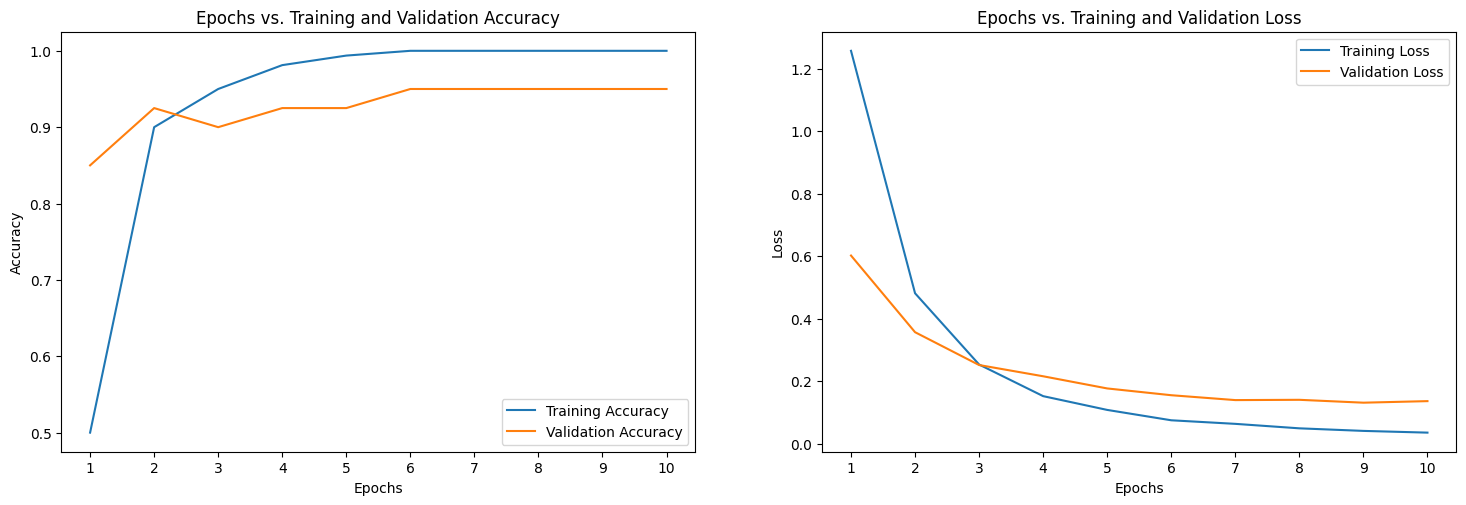

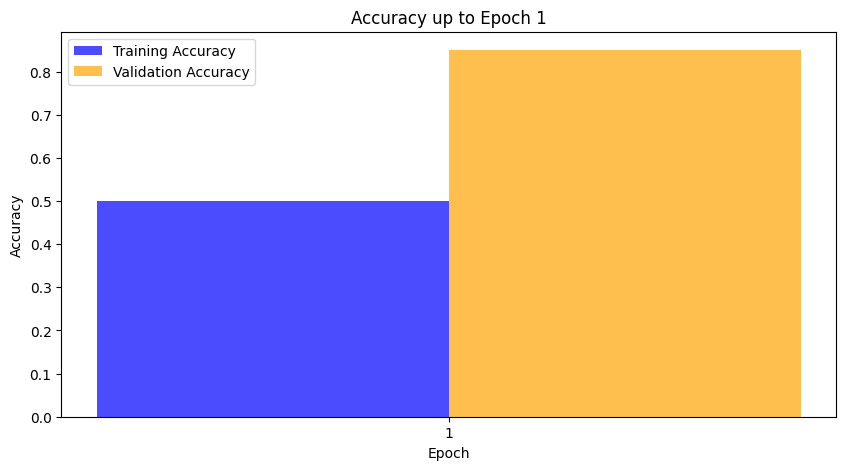

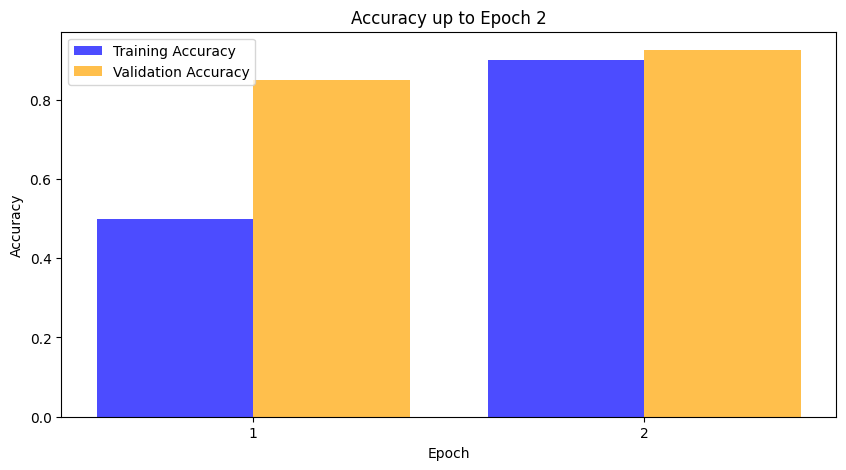

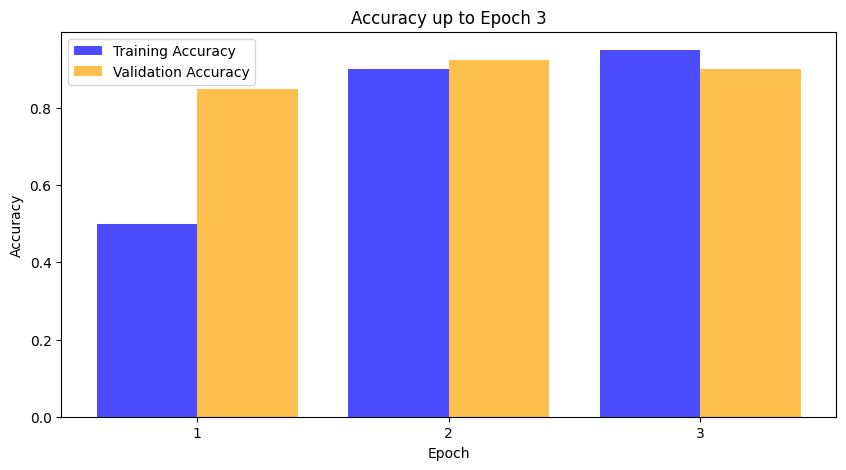

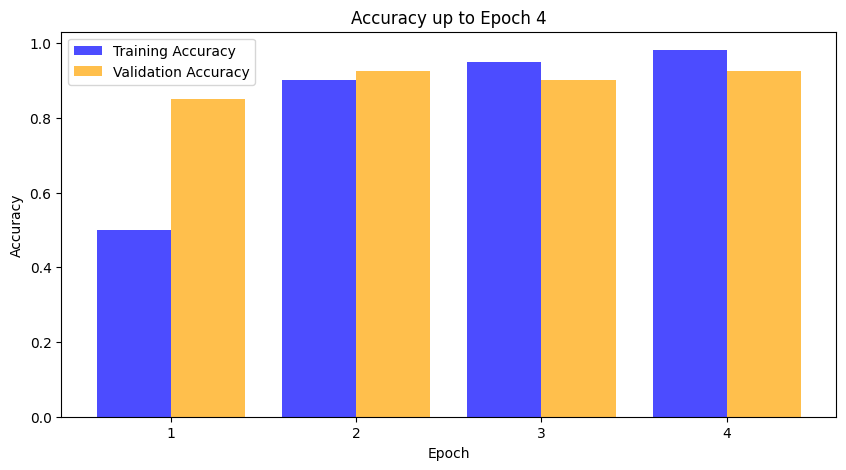

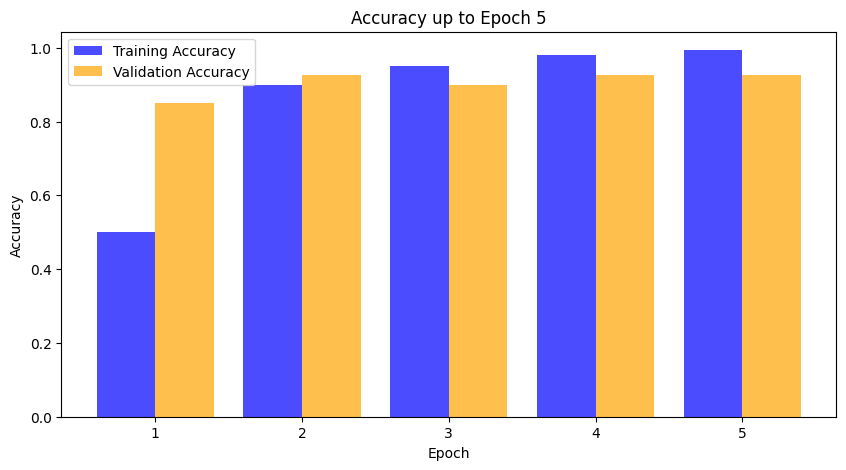

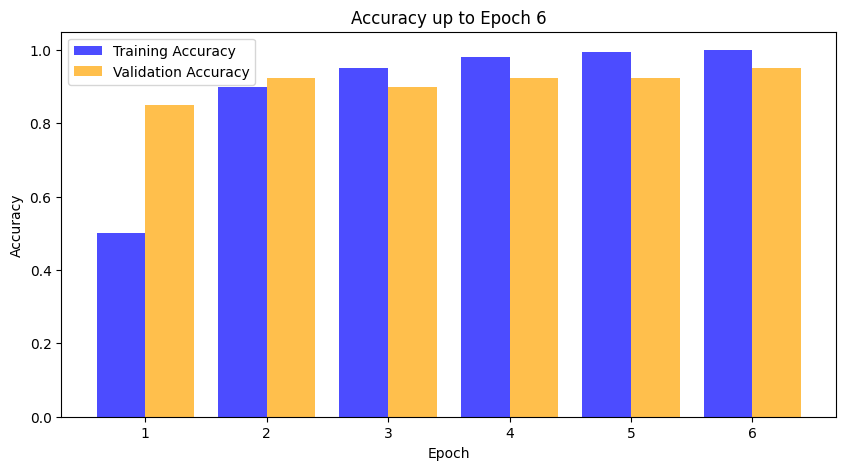

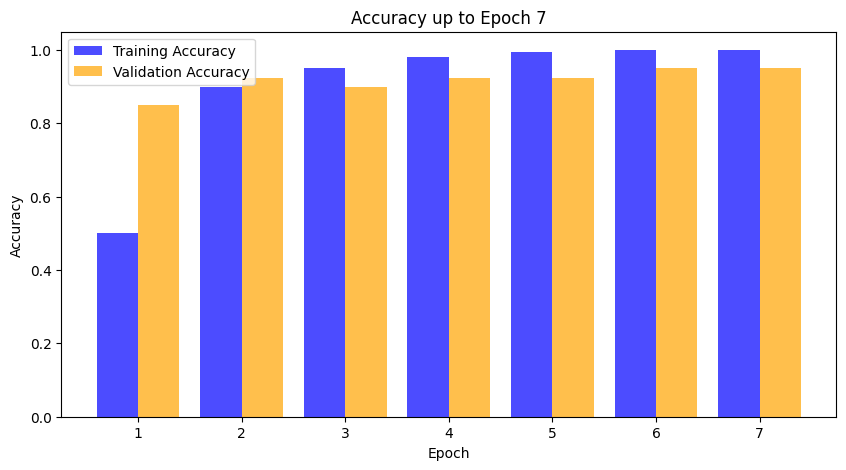

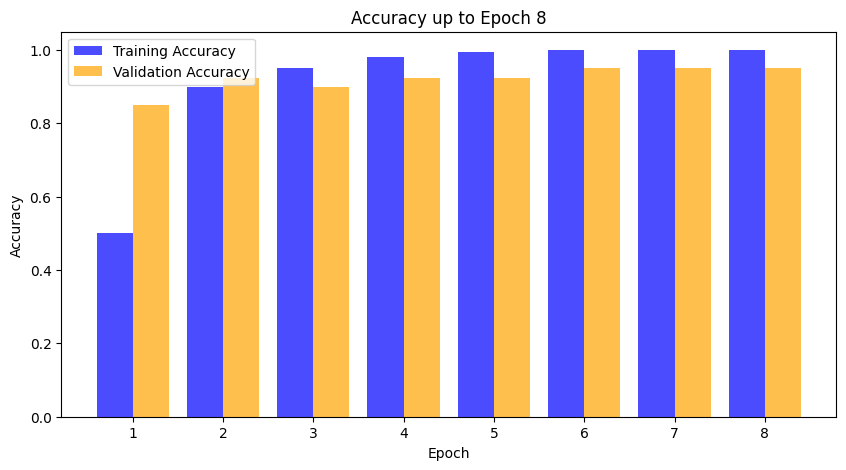

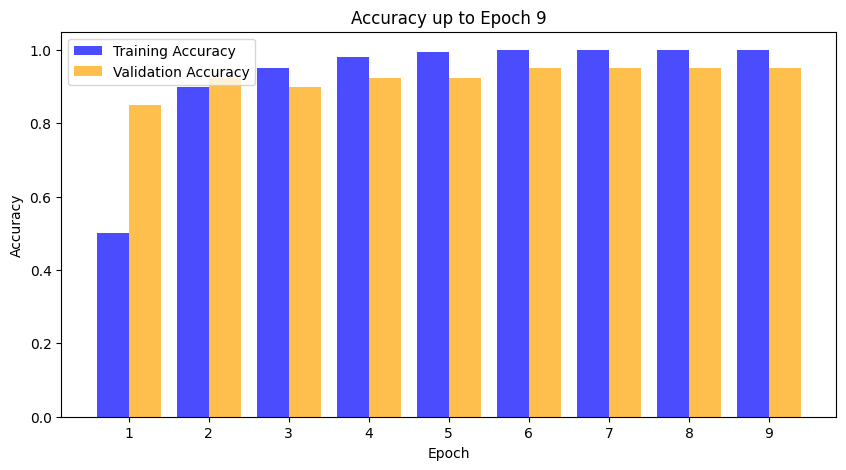

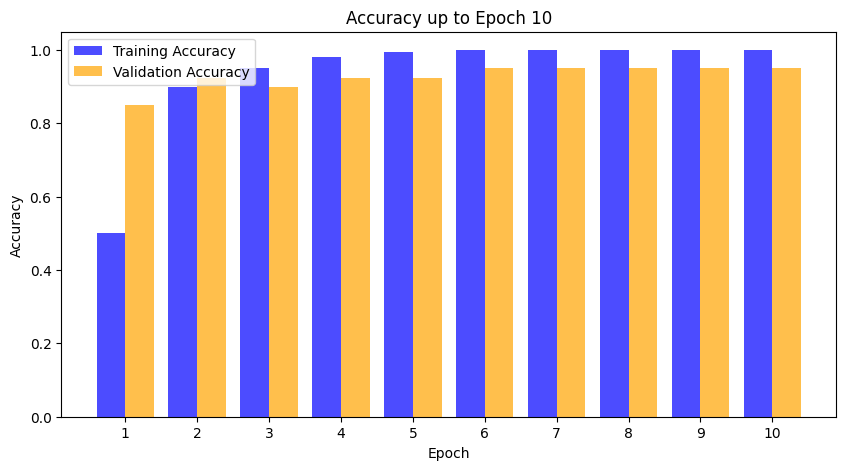

<Figure size 640x480 with 0 Axes>

In [ ]:
# Set up the matplotlib figure and axes, organized in a 2x2 grid
plt.figure(figsize=(18, 12))

# Determine the number of epochs
num_epochs = len(history.history['accuracy'])
epoch_ticks = range(1, num_epochs + 1)

# First subplot: Line plot for training and validation accuracy
plt.subplot(2, 2, 1)  # (rows, columns, panel number)
plt.plot(epoch_ticks, history.history['accuracy'], label='Training Accuracy')
plt.plot(epoch_ticks, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Epochs vs. Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epoch_ticks)  # Set x-axis ticks to epoch numbers
plt.legend()

# Second subplot: Line plot for training and validation loss
plt.subplot(2, 2, 2)
plt.plot(epoch_ticks, history.history['loss'], label='Training Loss')
plt.plot(epoch_ticks, history.history['val_loss'], label='Validation Loss')
plt.title('Epochs vs. Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epoch_ticks)  # Set x-axis ticks to epoch numbers
plt.legend()

# Function to display bar charts for accuracies up to a given epoch
def plot_bars_until_epoch(epoch, training_accuracies, validation_accuracies):
    plt.figure(figsize=(10, 5))
    bar_width = 0.4  # Width of the bars

    # Calculate the positions for each set of bars
    training_positions = np.arange(1, epoch + 1) - bar_width / 2
    validation_positions = np.arange(1, epoch + 1) + bar_width / 2

    # Bar chart for individual epoch training accuracy up to the current epoch
    plt.bar(training_positions, training_accuracies[:epoch], width=bar_width, color='blue', alpha=0.7, label='Training Accuracy')

    # Bar chart for individual epoch validation accuracy up to the current epoch
    plt.bar(validation_positions, validation_accuracies[:epoch], width=bar_width, color='orange', alpha=0.7, label='Validation Accuracy')

    plt.title(f'Accuracy up to Epoch {epoch}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.xticks(np.arange(1, epoch + 1))
    plt.show()

# Iterate over epochs to show the progression of accuracy in bar charts
for epoch in range(1, len(history.history['accuracy']) + 1):
    plot_bars_until_epoch(epoch, history.history['accuracy'], history.history['val_accuracy'])

# Display the plots
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

Output:
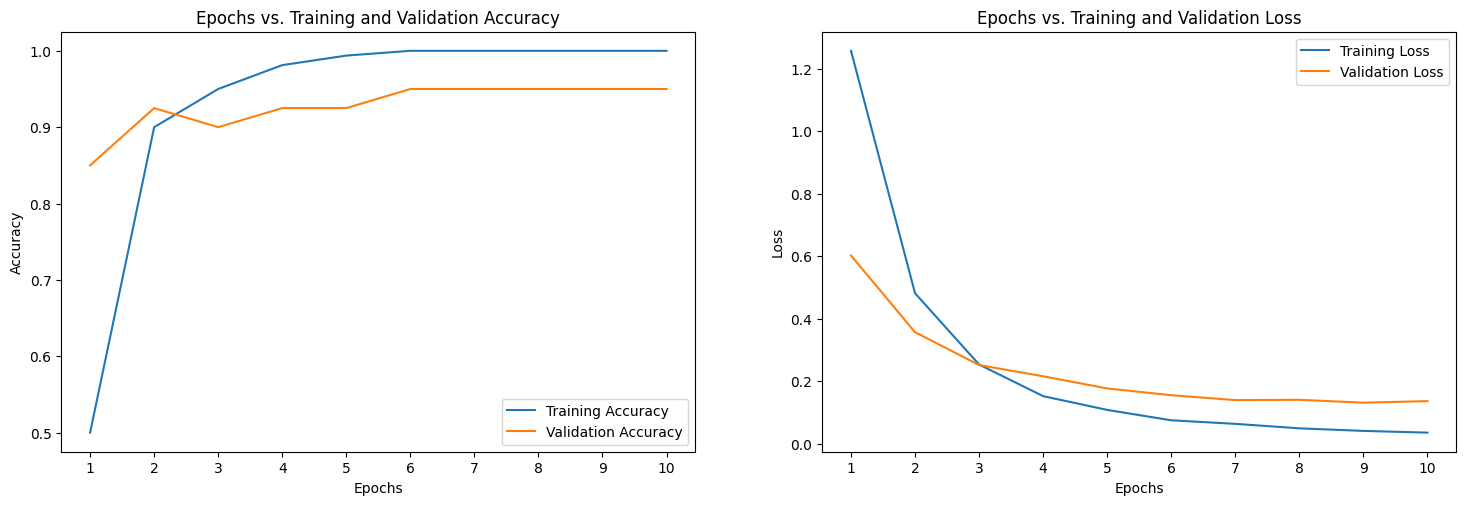


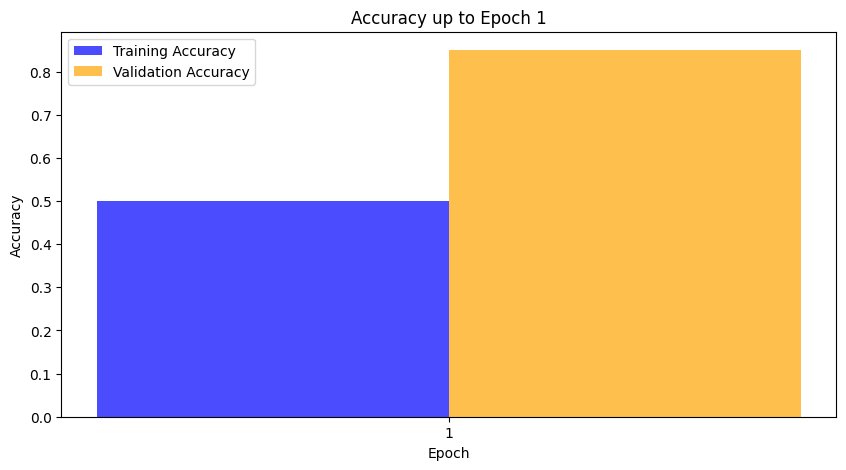

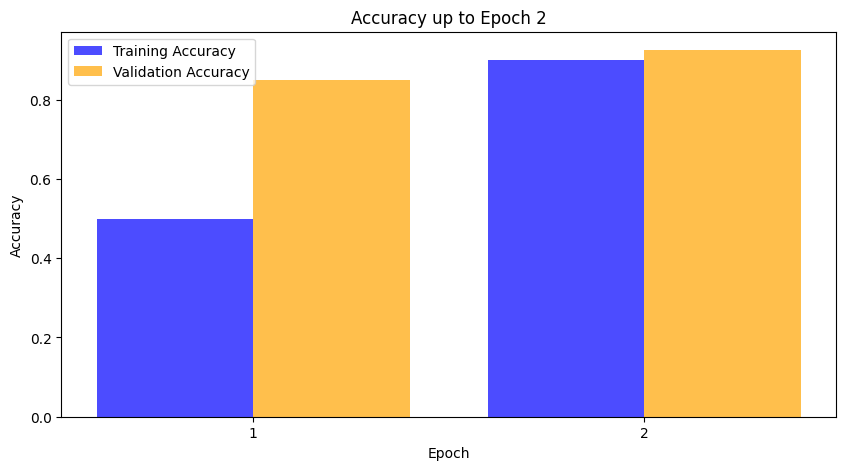

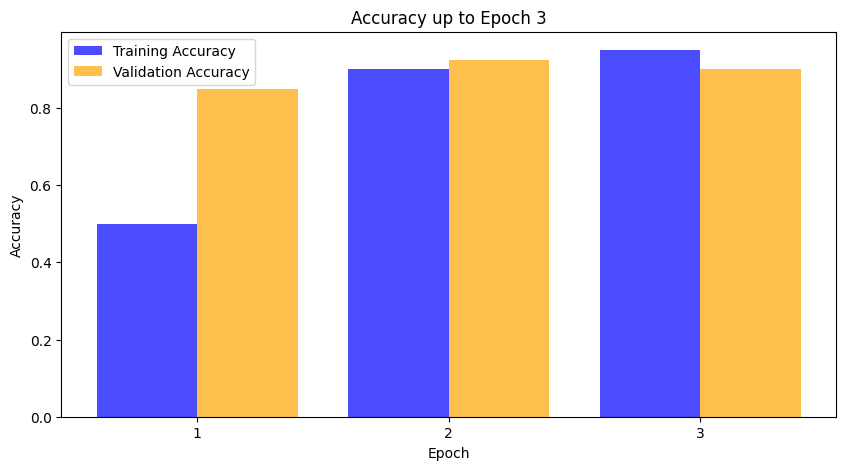

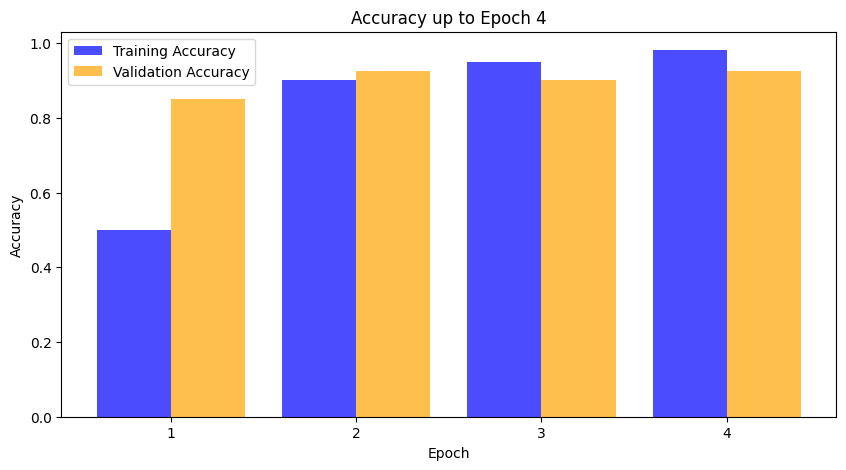

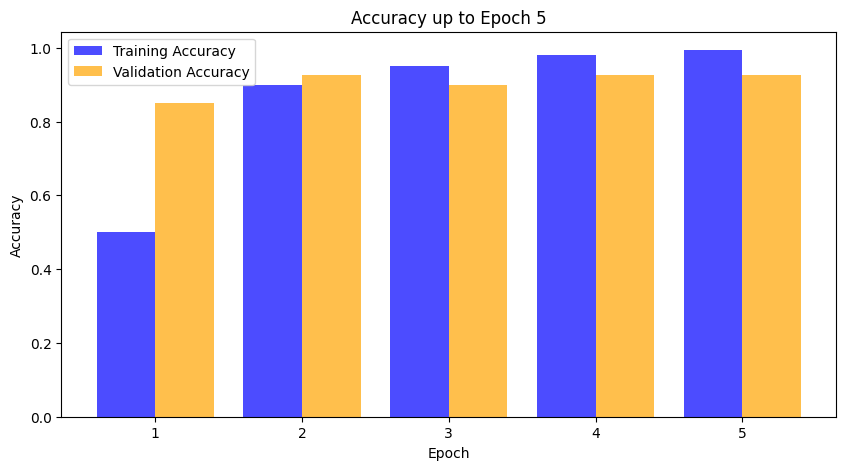

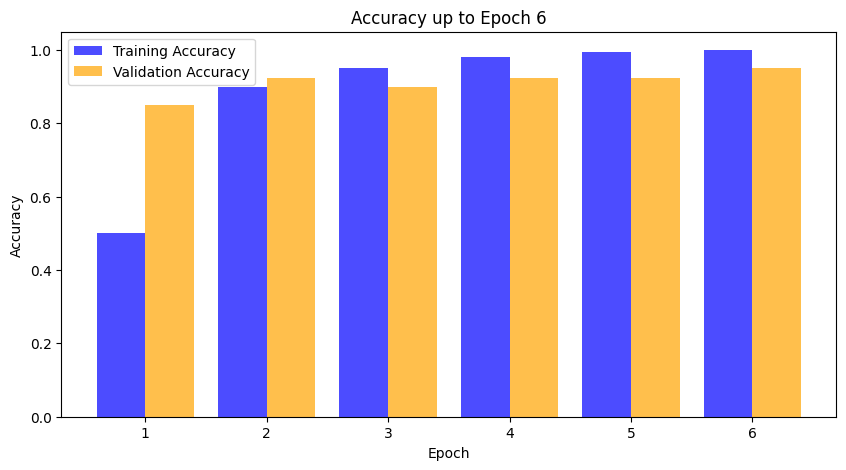

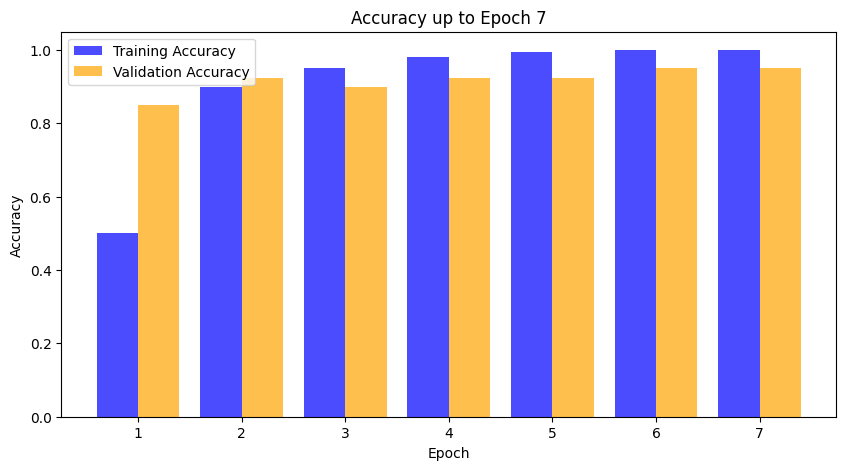

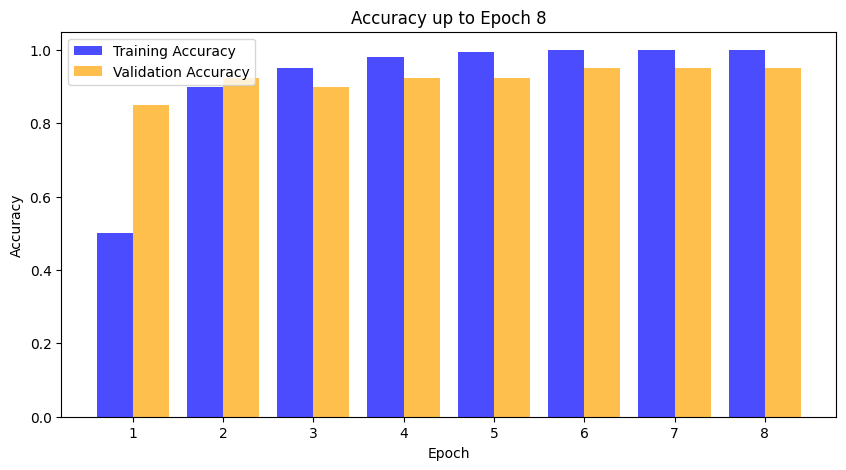

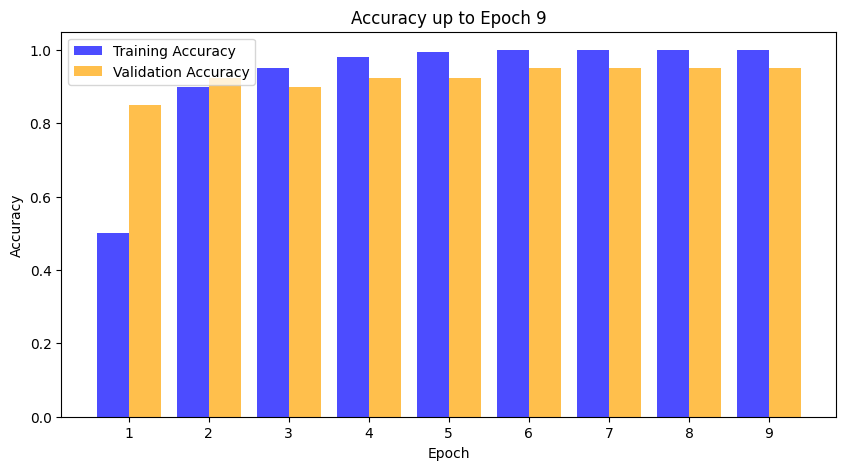

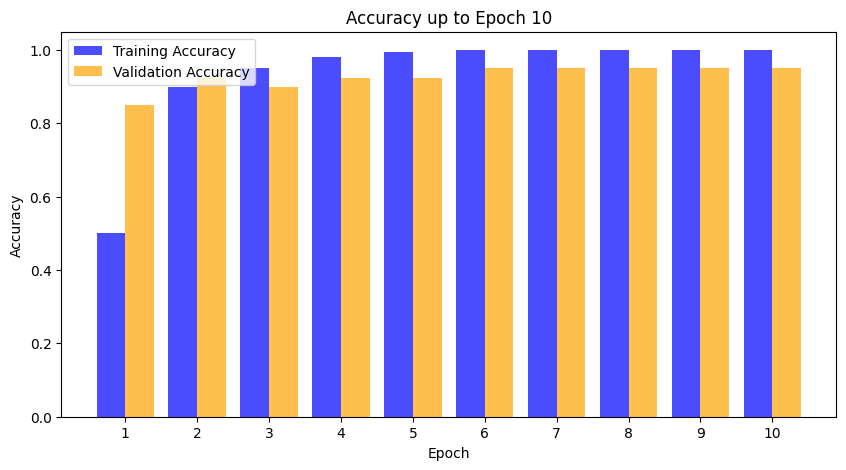

In [ ]:
# Print the average results over the epochs
print("Average Training Accuracy: {:.2f}%".format(average_training_accuracy * 100))
print("Average Validation Accuracy: {:.2f}%".format(average_validation_accuracy * 100))
print("Average Training Loss:", average_training_loss)
print("Average Validation Loss:", average_validation_loss)

Average Training Accuracy: 93.25%
Average Validation Accuracy: 92.75%
Average Training Loss: 0.2519112672656775
Average Validation Loss: 0.23088843524456024


Output:

Average Training Accuracy: 93.25%

Average Validation Accuracy: 92.75%

Average Training Loss: 0.2519112672656775

Average Validation Loss: 0.23088843524456024